In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Show plots inline
%matplotlib inline

In [ ]:
# suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/smccracken13/NBA-All-Star-Prediction-Project/main/nba_data_cleaned.csv')
df.shape

(22462, 57)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22462 entries, 0 to 22461
Data columns (total 57 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       22462 non-null  int64  
 1   seas_id          22462 non-null  int64  
 2   season           22462 non-null  int64  
 3   player_id        22462 non-null  int64  
 4   player           22462 non-null  object 
 5   pos              22462 non-null  object 
 6   age              22462 non-null  float64
 7   experience       22462 non-null  int64  
 8   tm               22462 non-null  object 
 9   g                22462 non-null  int64  
 10  mp               22462 non-null  float64
 11  per              22462 non-null  float64
 12  ts_percent       22462 non-null  float64
 13  x3p_ar           22462 non-null  float64
 14  f_tr             22462 non-null  float64
 15  orb_percent      22462 non-null  float64
 16  drb_percent      22462 non-null  float64
 17  trb_percent 

In [ ]:
df.describe()

Unnamed: 0       seas_id        season     player_id           age  \
count  22462.00000  22462.000000  22462.000000  22462.000000  22462.000000   
mean   11233.55329  19223.470706   2003.392663   3144.307319     26.708574   
std     6486.38312   6486.394282     12.196331    869.850159      4.025907   
min        0.00000   7991.000000   1980.000000    834.000000     18.000000   
25%     5615.25000  13606.250000   1993.000000   2428.000000     24.000000   
50%    11235.50000  19221.500000   2004.000000   3147.500000     26.000000   
75%    16850.75000  24841.750000   2014.000000   3832.750000     29.000000   
max    22466.00000  30457.000000   2022.000000   5024.000000     44.000000   

         experience             g            mp           per    ts_percent  \
count  22462.000000  22462.000000  22462.000000  22462.000000  22462.000000   
mean       5.398139     48.065533   1119.580670     12.427135      0.506266   
std        3.885731     26.696112    906.078862      6.403949      0.104959   
min        1.000000      1.000000      1.000000    -90.600000      0.000000   
25%        2.000000     24.000000    290.000000      9.600000      0.475000   
50%        4.000000     52.000000    938.000000     12.600000      0.520000   
75%        8.000000     74.000000   1818.750000     15.700000      0.557000   
max       22.000000     85.000000   3533.000000    133.800000      1.500000   

       ...           trb           ast           stl           blk  \
count  ...  22462.000000  22462.000000  22462.000000  22462.000000   
mean   ...    197.621717    107.194729     37.119090     23.163298   
std    ...    198.338887    133.910092     36.656747     34.849715   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...     44.000000     16.000000      8.000000      3.000000   
50%    ...    139.000000     59.000000     27.000000     11.000000   
75%    ...    285.000000    146.000000     55.000000     28.000000   
max    ...   1530.000000   1164.000000    301.000000    456.000000   

               tov            pf           pts        attend  tm_win_percent  \
count  22462.00000  22462.000000  22462.000000  2.246200e+04    22462.000000   
mean      68.95459    102.958552    473.226204  6.290815e+05        0.493509   
std       65.28934     79.176517    472.506627  1.718946e+05        0.147450   
min        0.00000      0.000000      0.000000  5.817000e+03        0.106061   
25%       16.00000     32.000000     89.000000  5.607340e+05        0.390244   
50%       50.00000     92.000000    325.000000  6.635000e+05        0.500000   
75%      105.00000    161.000000    728.000000  7.364610e+05        0.597561   
max      464.00000    386.000000   3041.000000  1.072572e+06        0.890244   

       seas_avg_attend  
count     22462.000000  
mean     629082.292545  
std      141149.866691  
min       58864.784787  
25%      574509.304569  
50%      689369.407895  
75%      712764.487226  
max      736547.361983  

[8 rows x 53 columns]

In [ ]:
df.columns

Index(['Unnamed: 0', 'seas_id', 'season', 'player_id', 'player', 'pos', 'age',
       'experience', 'tm', 'g', 'mp', 'per', 'ts_percent', 'x3p_ar', 'f_tr',
       'orb_percent', 'drb_percent', 'trb_percent', 'ast_percent',
       'stl_percent', 'blk_percent', 'tov_percent', 'usg_percent', 'ows',
       'dws', 'ws', 'ws_48', 'obpm', 'dbpm', 'bpm', 'vorp', 'fg', 'fga',
       'fg_percent', 'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa',
       'x2p_percent', 'e_fg_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'all_star', 'attend',
       'tm_win_percent', 'seas_avg_attend'],
      dtype='object')

Later I see that players with just a few games cause issues with many of the stats. I am going to drop all rows that have fewer than 5 games since those players would not be considered for All-Star teams.

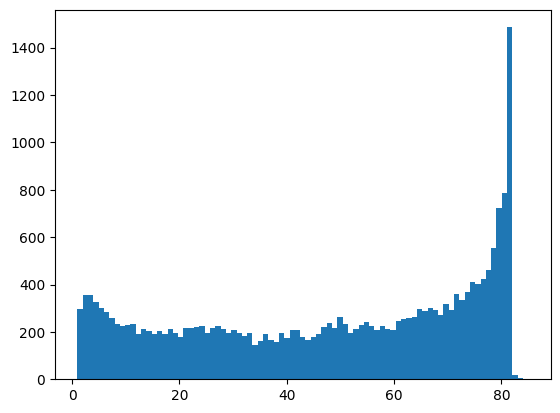

In [ ]:
plt.hist(df['g'], bins=85)
plt.show()

In [ ]:
len(df[df['g']<5])/22462
# about 6% of players played fewer than 5 games

0.05934467099991096

In [ ]:
# drop all rows with fewer than 5 games played
df=df[df['g']>=5]

## Plot histograms of each feature

In [ ]:
# create function to speed up plotting
def hist_list(list):
  list = list
  fig, ax =plt.subplots(1,len(list), figsize=(20,4))
  for i in range(len(list)):
    sns.histplot(data=df, x=list[i], ax=ax[i])
  plt.show()

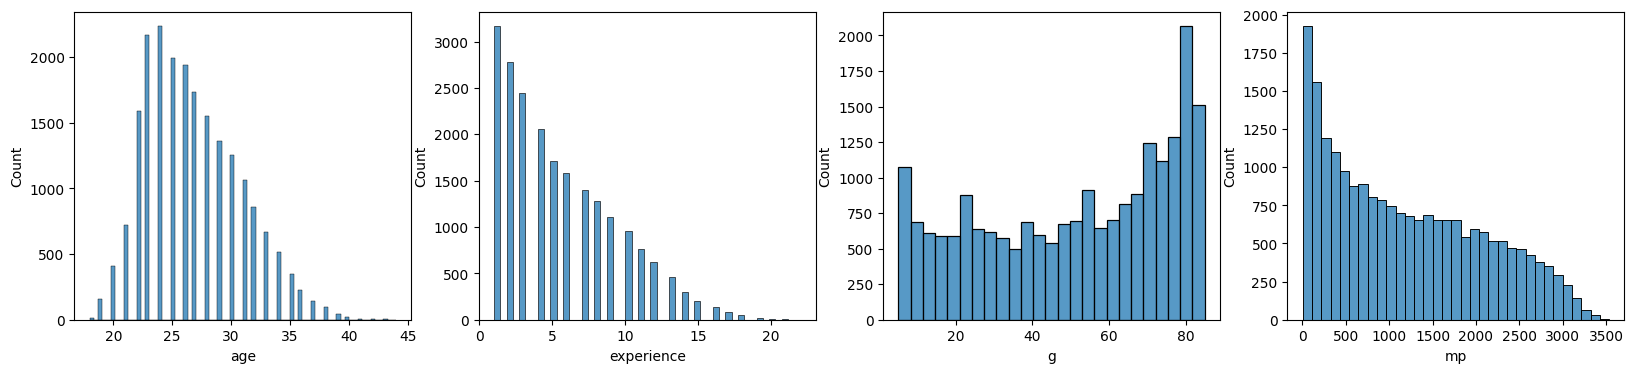

In [ ]:
# plot age, experience, games and minutes played columns
hist_list(['age','experience','g','mp'])

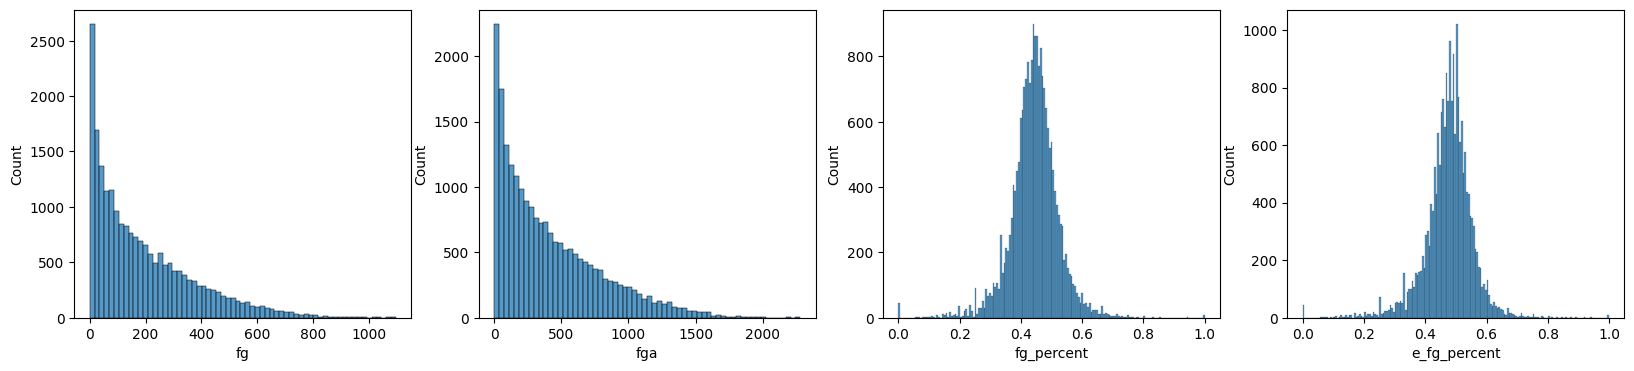

In [ ]:
# plot field goal stats
hist_list(['fg', 'fga', 'fg_percent','e_fg_percent'])

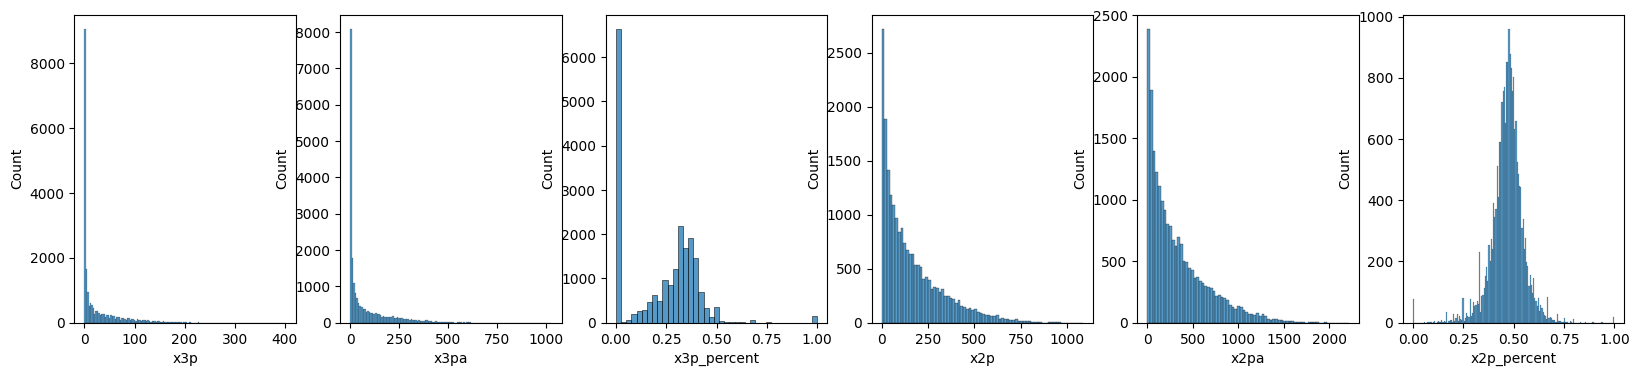

In [ ]:
# plot 3-point and 2-point stats
hist_list(['x3p', 'x3pa', 'x3p_percent','x2p', 'x2pa', 'x2p_percent'])

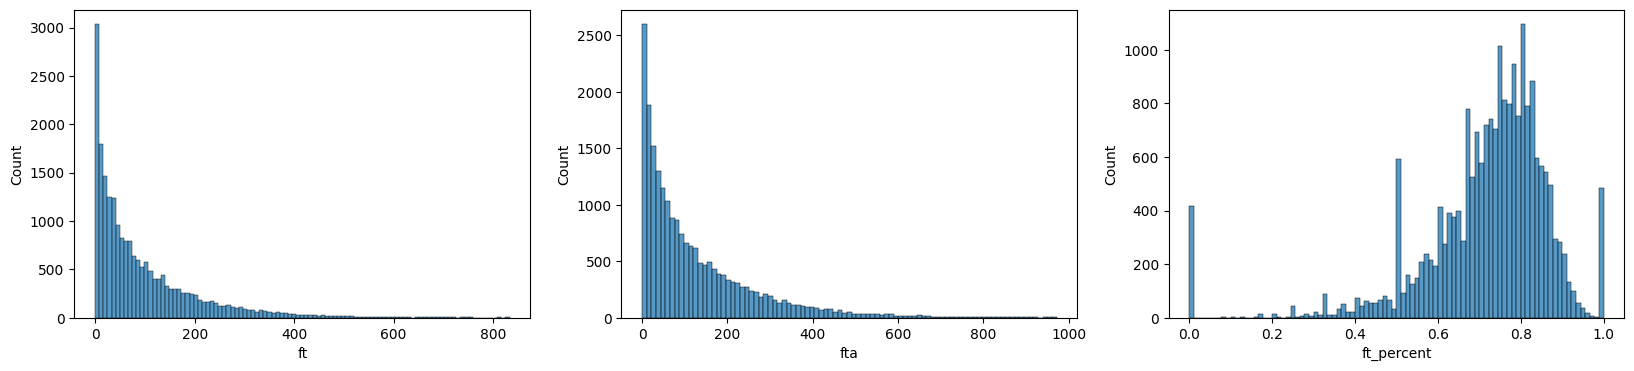

In [ ]:
# plot free-throw stats
hist_list(['ft', 'fta', 'ft_percent'])

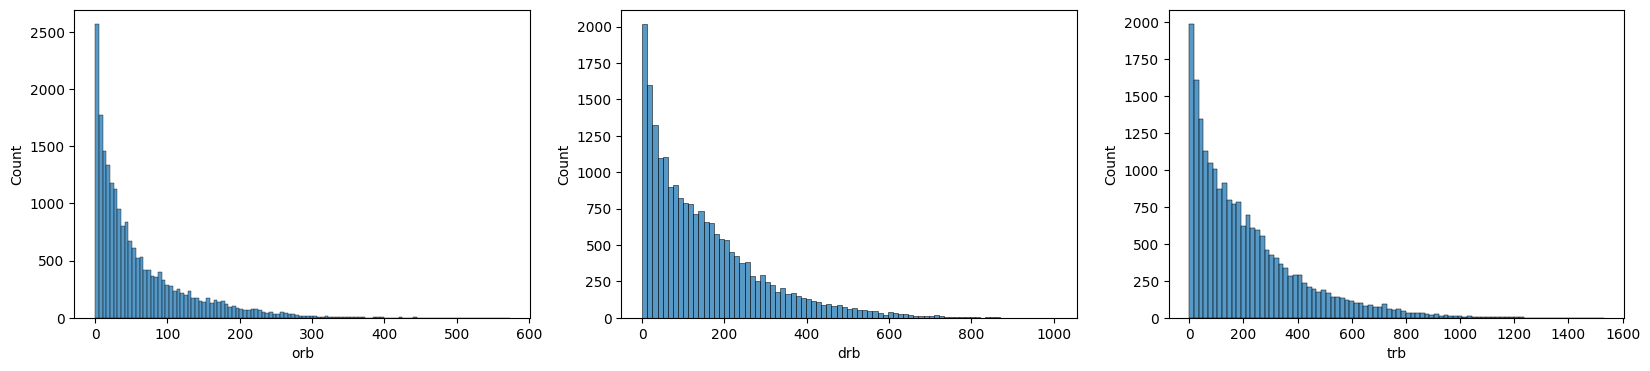

In [ ]:
# plot rebound stats
hist_list(['orb', 'drb','trb'])

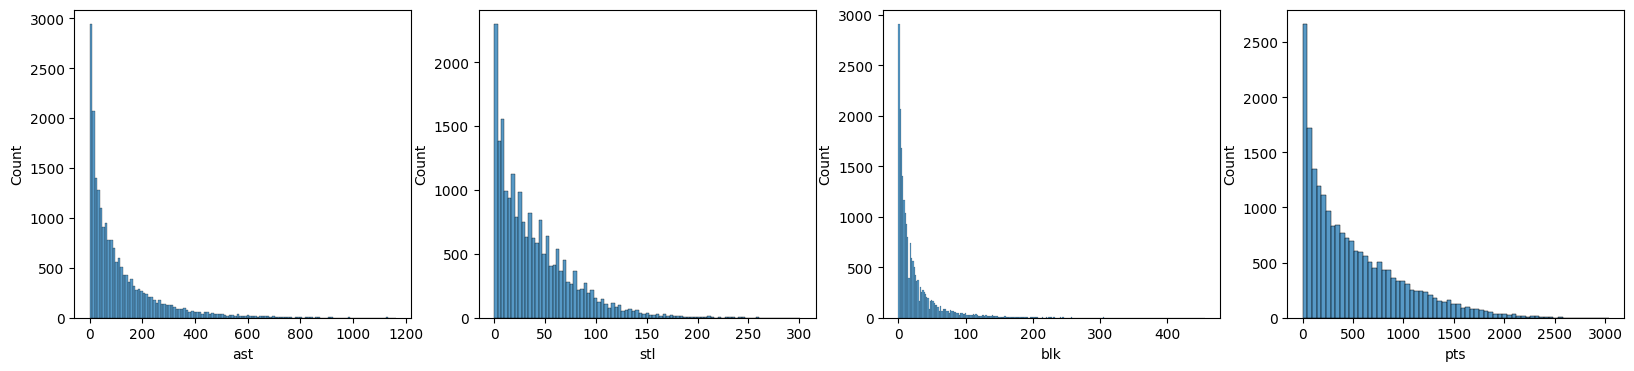

In [ ]:
# plot assist, steals, blocks, points
hist_list(['ast', 'stl', 'blk', 'pts'])

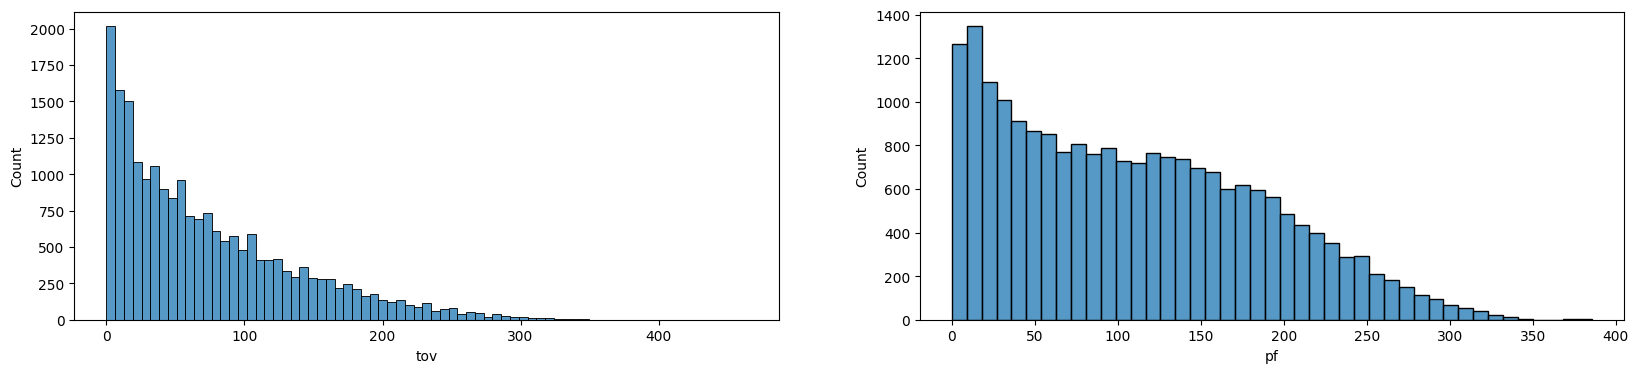

In [ ]:
# plot turnovers and personal fouls
hist_list(['tov','pf'])

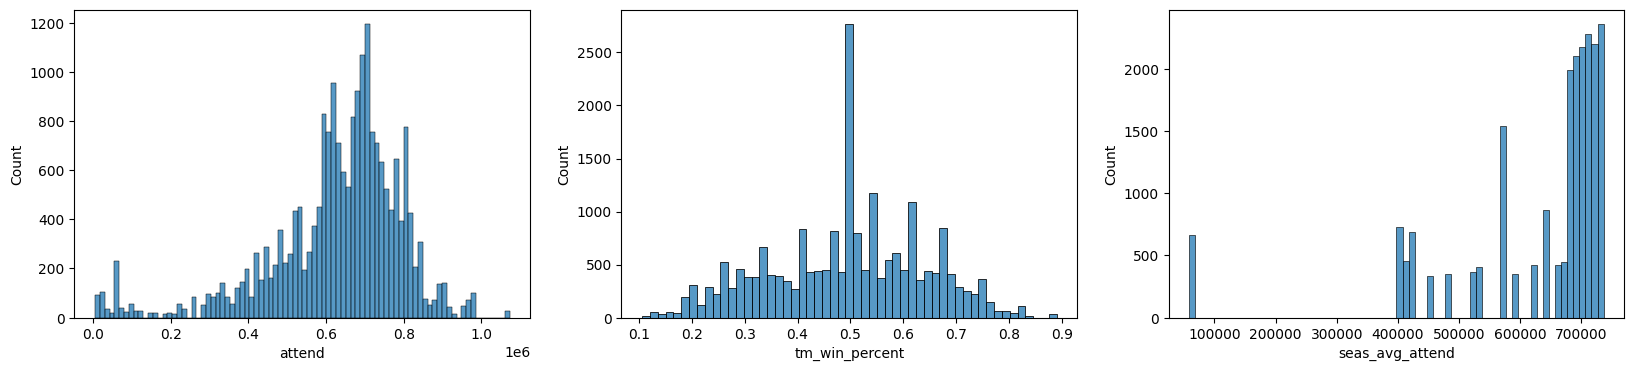

In [ ]:
# plot team stats: win%, attendance, season average attendance
hist_list(['attend','tm_win_percent', 'seas_avg_attend'])

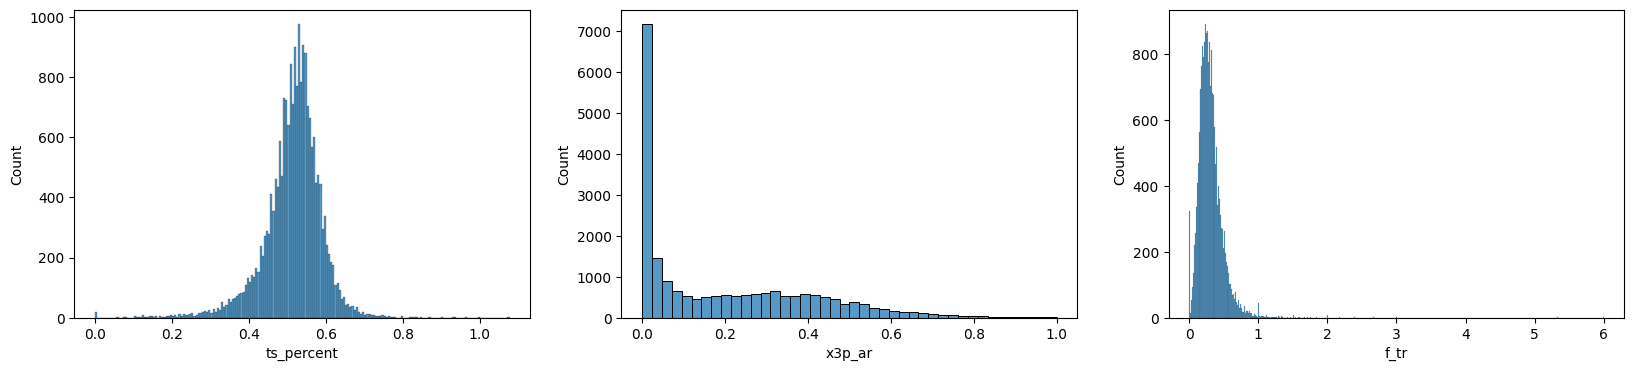

In [ ]:
# plot advanced shooting stats: true shooting, 3-point, free-throw
advanced_stats = ['per', 'ts_percent', 'x3p_ar', 'f_tr',
                  'orb_percent', 'drb_percent', 'trb_percent',
                  'ast_percent','stl_percent', 'blk_percent', 'tov_percent', 'usg_percent',
                  'ows','dws', 'ws', 'ws_48', 'obpm', 'dbpm', 'bpm', 'vorp']
hist_list(['ts_percent', 'x3p_ar', 'f_tr'])

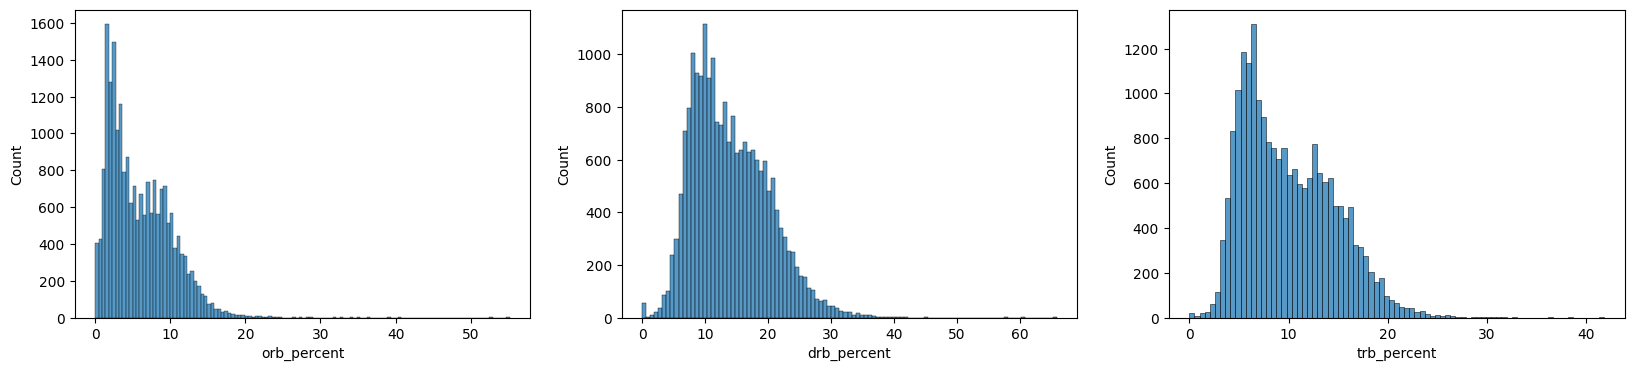

In [ ]:
# plot advanced rebounding stats
hist_list(['orb_percent', 'drb_percent', 'trb_percent'])

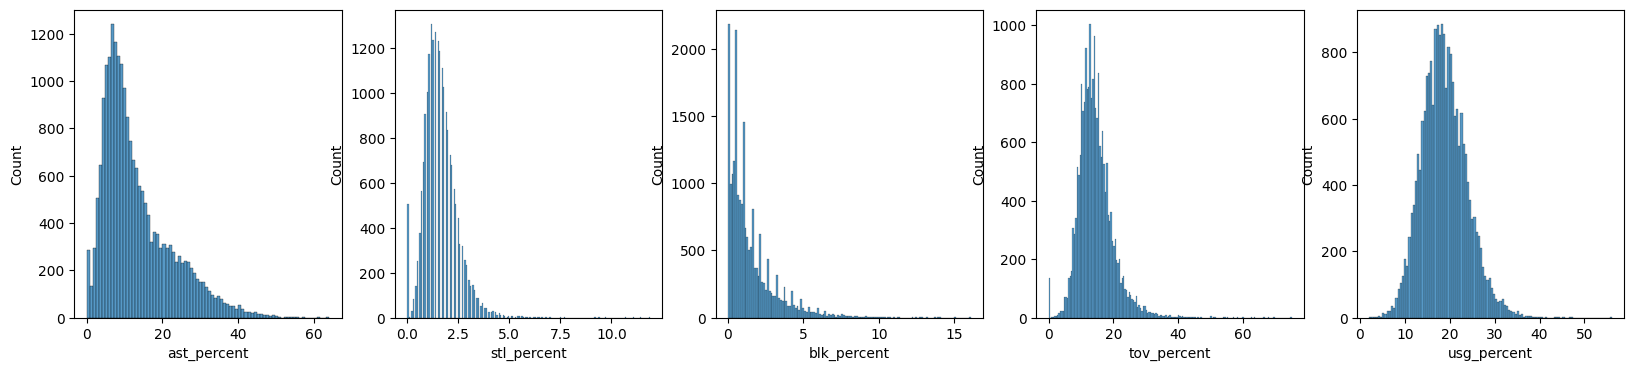

In [ ]:
# plot advanced assists, steals, blocks, turnovers, usage
hist_list(['ast_percent','stl_percent', 'blk_percent', 'tov_percent', 'usg_percent'])

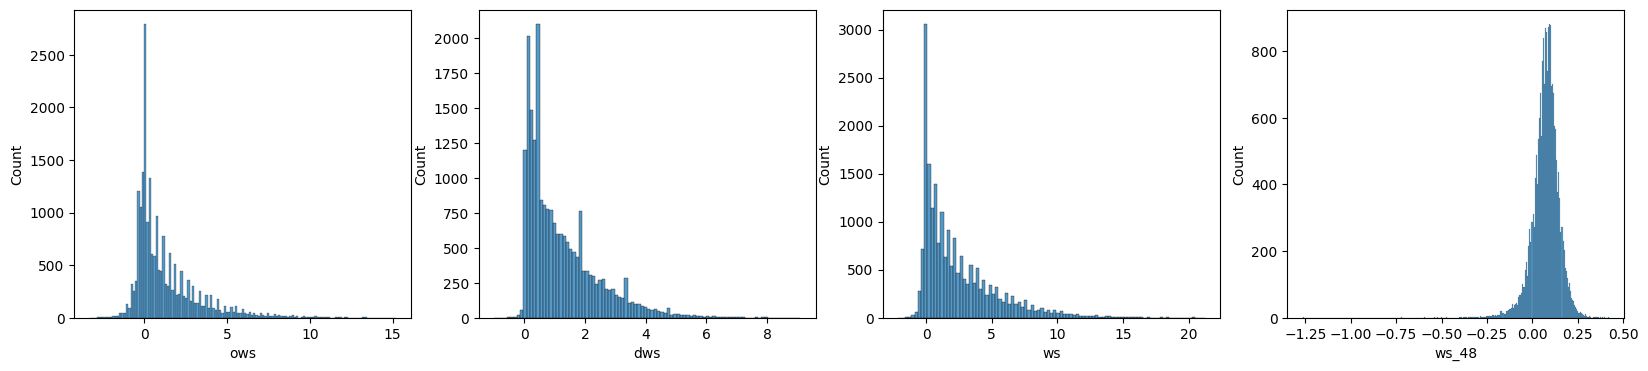

In [ ]:
# plot win share stats
hist_list(['ows','dws', 'ws', 'ws_48'])

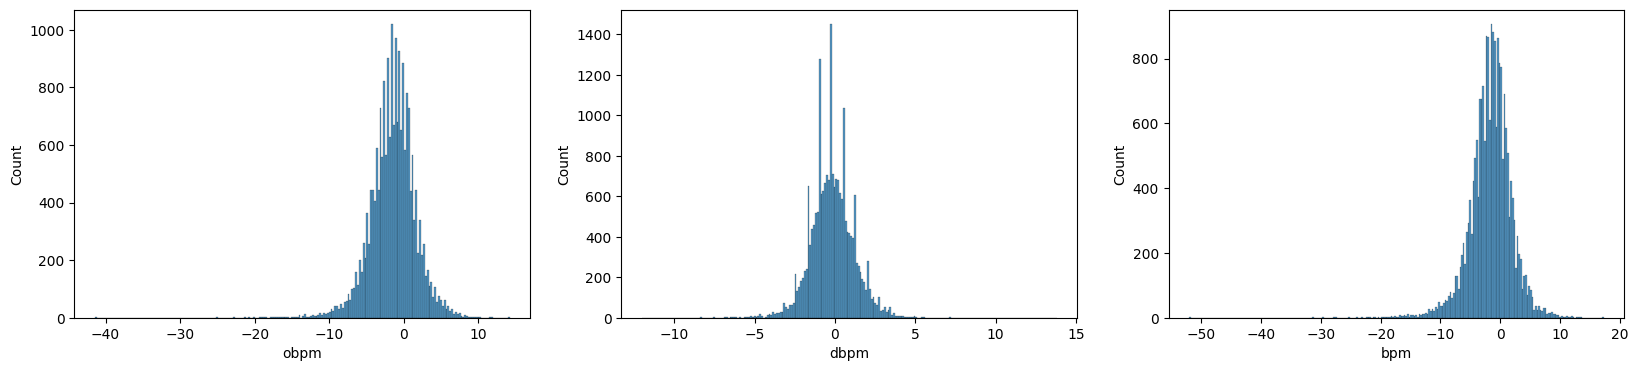

In [ ]:
# plot box plus/minus stats
hist_list(['obpm', 'dbpm', 'bpm'])

In [ ]:
df['obpm'].sort_values(ascending=False).head(10)
df[df['obpm']==199.4].T
# Naz Mitrou-Long's 2018 per and bpm are off the charts. He played only one minute that season.
# Drop that row
df = df[df['seas_id']!=27392]

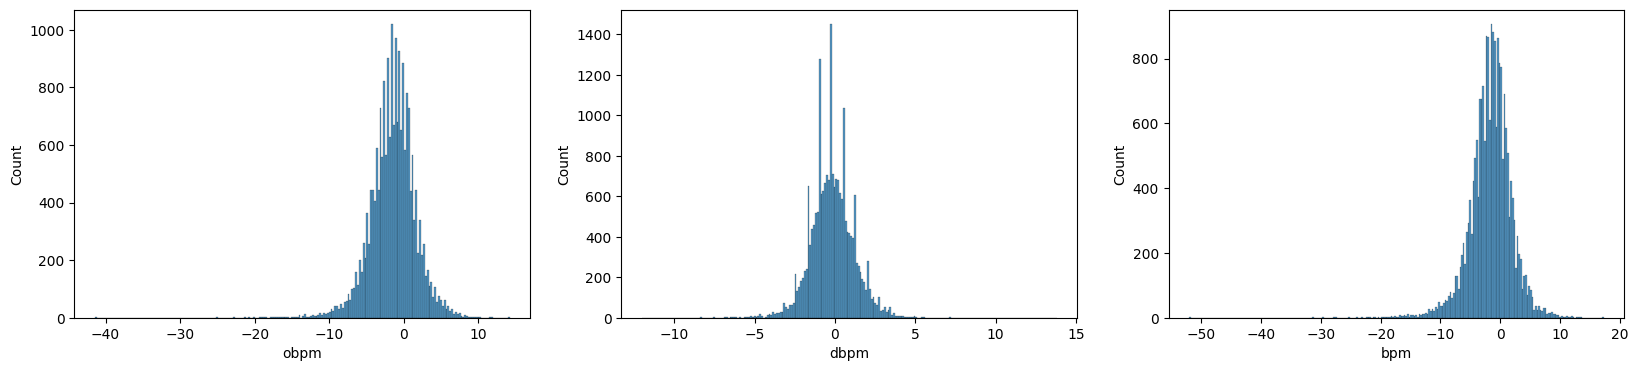

In [ ]:
# plot box plus/minus stats
hist_list(['obpm', 'dbpm', 'bpm'])

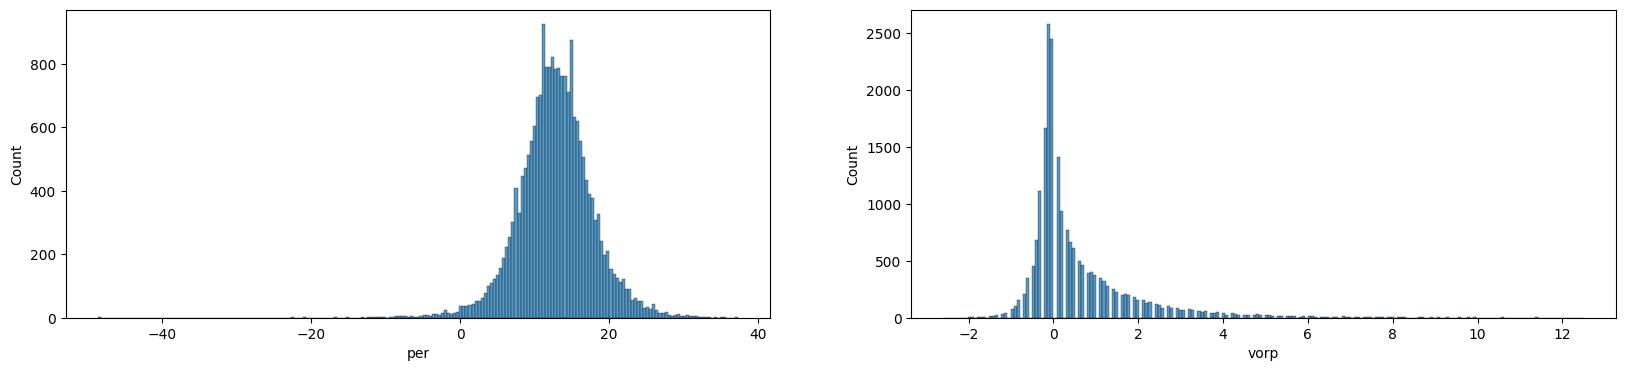

In [ ]:
# plot player-efficiency-rating and value-over-replacement
hist_list(['per','vorp'])

## Correlations

In [ ]:
# plot correlation of each feature to all-star category
df.drop(['seas_id','season','player_id','Unnamed: 0','seas_avg_attend'],axis=1).corr()['all_star'].sort_values(ascending=False)

all_star          1.000000
vorp              0.602031
ws                0.520594
ows               0.518699
ft                0.485983
fta               0.485053
pts               0.439707
fg                0.420941
x2p               0.416536
dws               0.395799
fga               0.395220
x2pa              0.393738
tov               0.375006
per               0.369616
bpm               0.344461
drb               0.343927
obpm              0.341724
ast               0.334982
trb               0.319512
stl               0.313836
mp                0.296625
usg_percent       0.293657
ws_48             0.293194
blk               0.252289
orb               0.234731
ast_percent       0.191741
pf                0.189319
x3pa              0.166677
tm_win_percent    0.164450
g                 0.162233
x3p               0.160373
ts_percent        0.141853
dbpm              0.139449
fg_percent        0.119109
x2p_percent       0.106274
e_fg_percent      0.105870
drb_percent       0.102200
f

<Axes: >

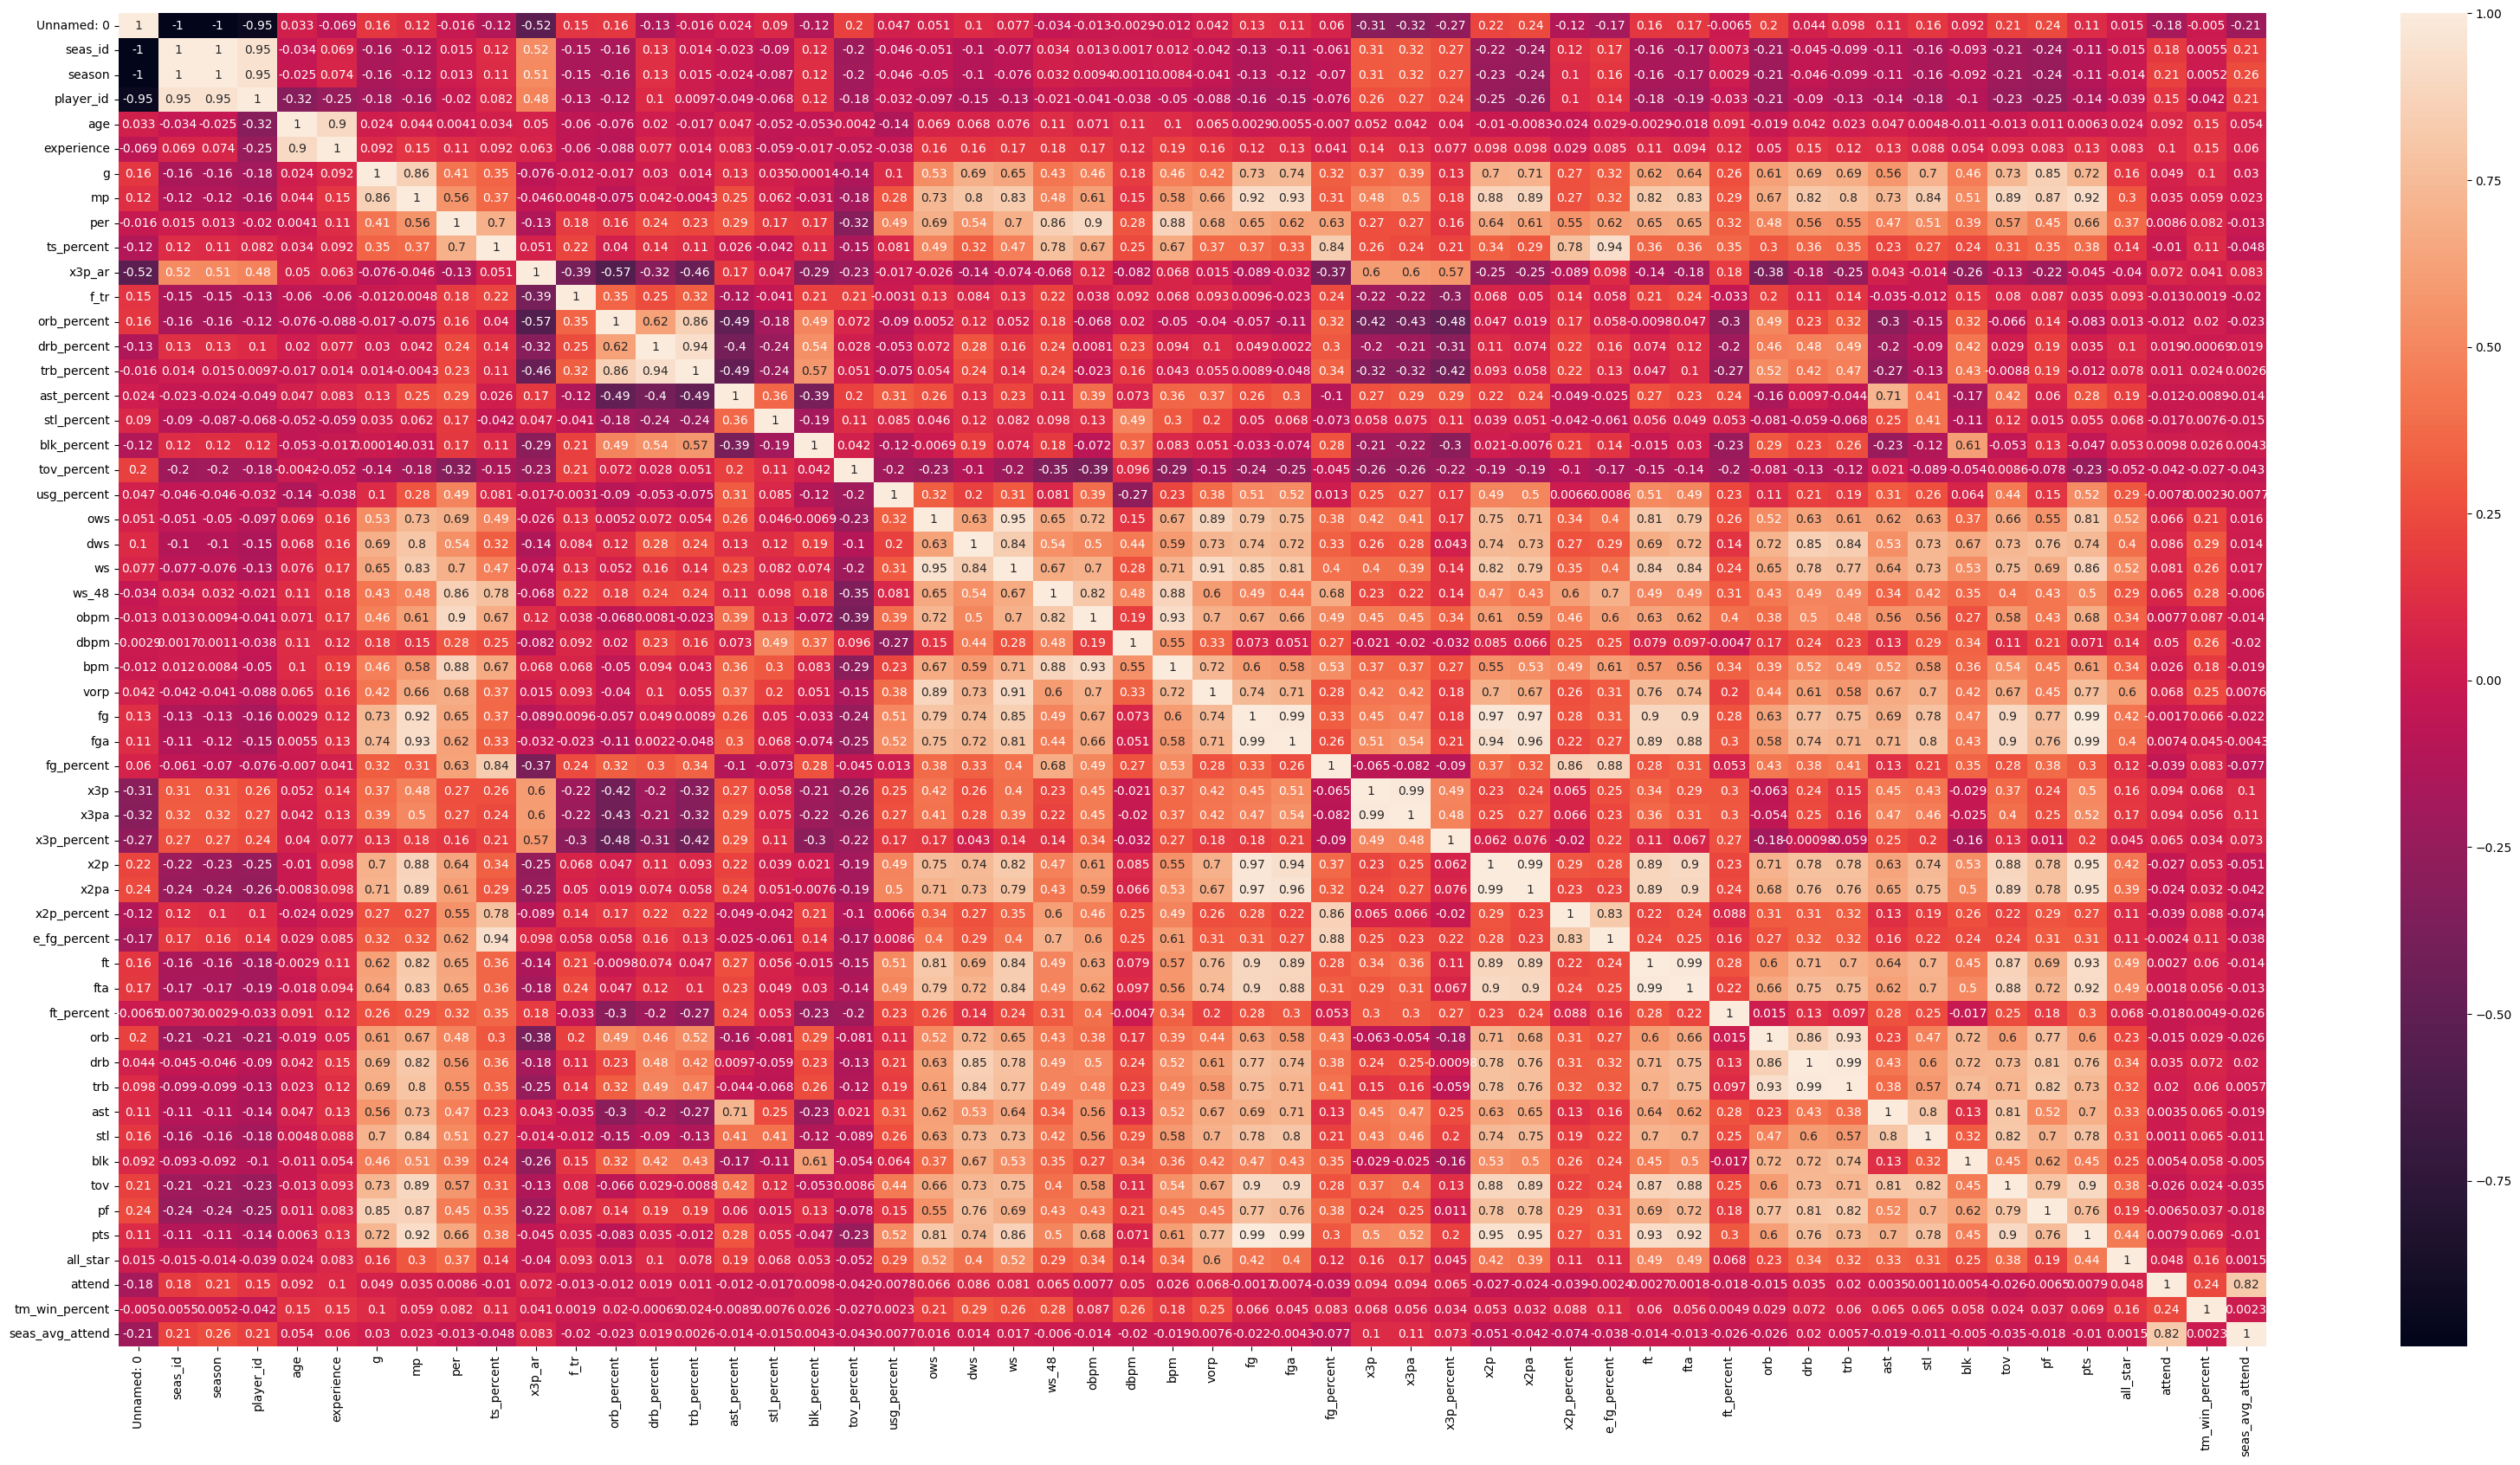

In [ ]:
# heatmap
plt.figure(figsize=(40,20))
sns.heatmap(df.corr(), annot=True)

In [ ]:
corr = df.drop(['seas_id','season','player_id','Unnamed: 0'],axis=1).corr().stack()
corr = corr[corr.index.get_level_values(0) != corr.index.get_level_values(1)]
corr.sort_values(ascending=False).head(60)
#top correlated groups:
# (pts, fg, fga, x2p, x2pa, mp, tov, fta, ft),
# (x3p, x3pa),
# (trb, drb, orb),
# (ows, ws),
# (ts_percent, e_fg_percent, fg_percent),
# (bpm, obpm, per)

pts           fg              0.993073
fg            pts             0.993073
x2p           x2pa            0.992534
x2pa          x2p             0.992534
x3p           x3pa            0.991408
x3pa          x3p             0.991408
fg            fga             0.989798
fga           fg              0.989798
pts           fga             0.989202
fga           pts             0.989202
ft            fta             0.988478
fta           ft              0.988478
drb           trb             0.986053
trb           drb             0.986053
x2p           fg              0.972001
fg            x2p             0.972001
              x2pa            0.969189
x2pa          fg              0.969189
fga           x2pa            0.955422
x2pa          fga             0.955422
x2p           pts             0.949892
pts           x2p             0.949892
              x2pa            0.949193
x2pa          pts             0.949193
ws            ows             0.948254
ows           ws         

In [ ]:
# get a smaller df to speed up pairplots
quarter_df = df.sample(frac=0.25, replace=True, random_state=1)

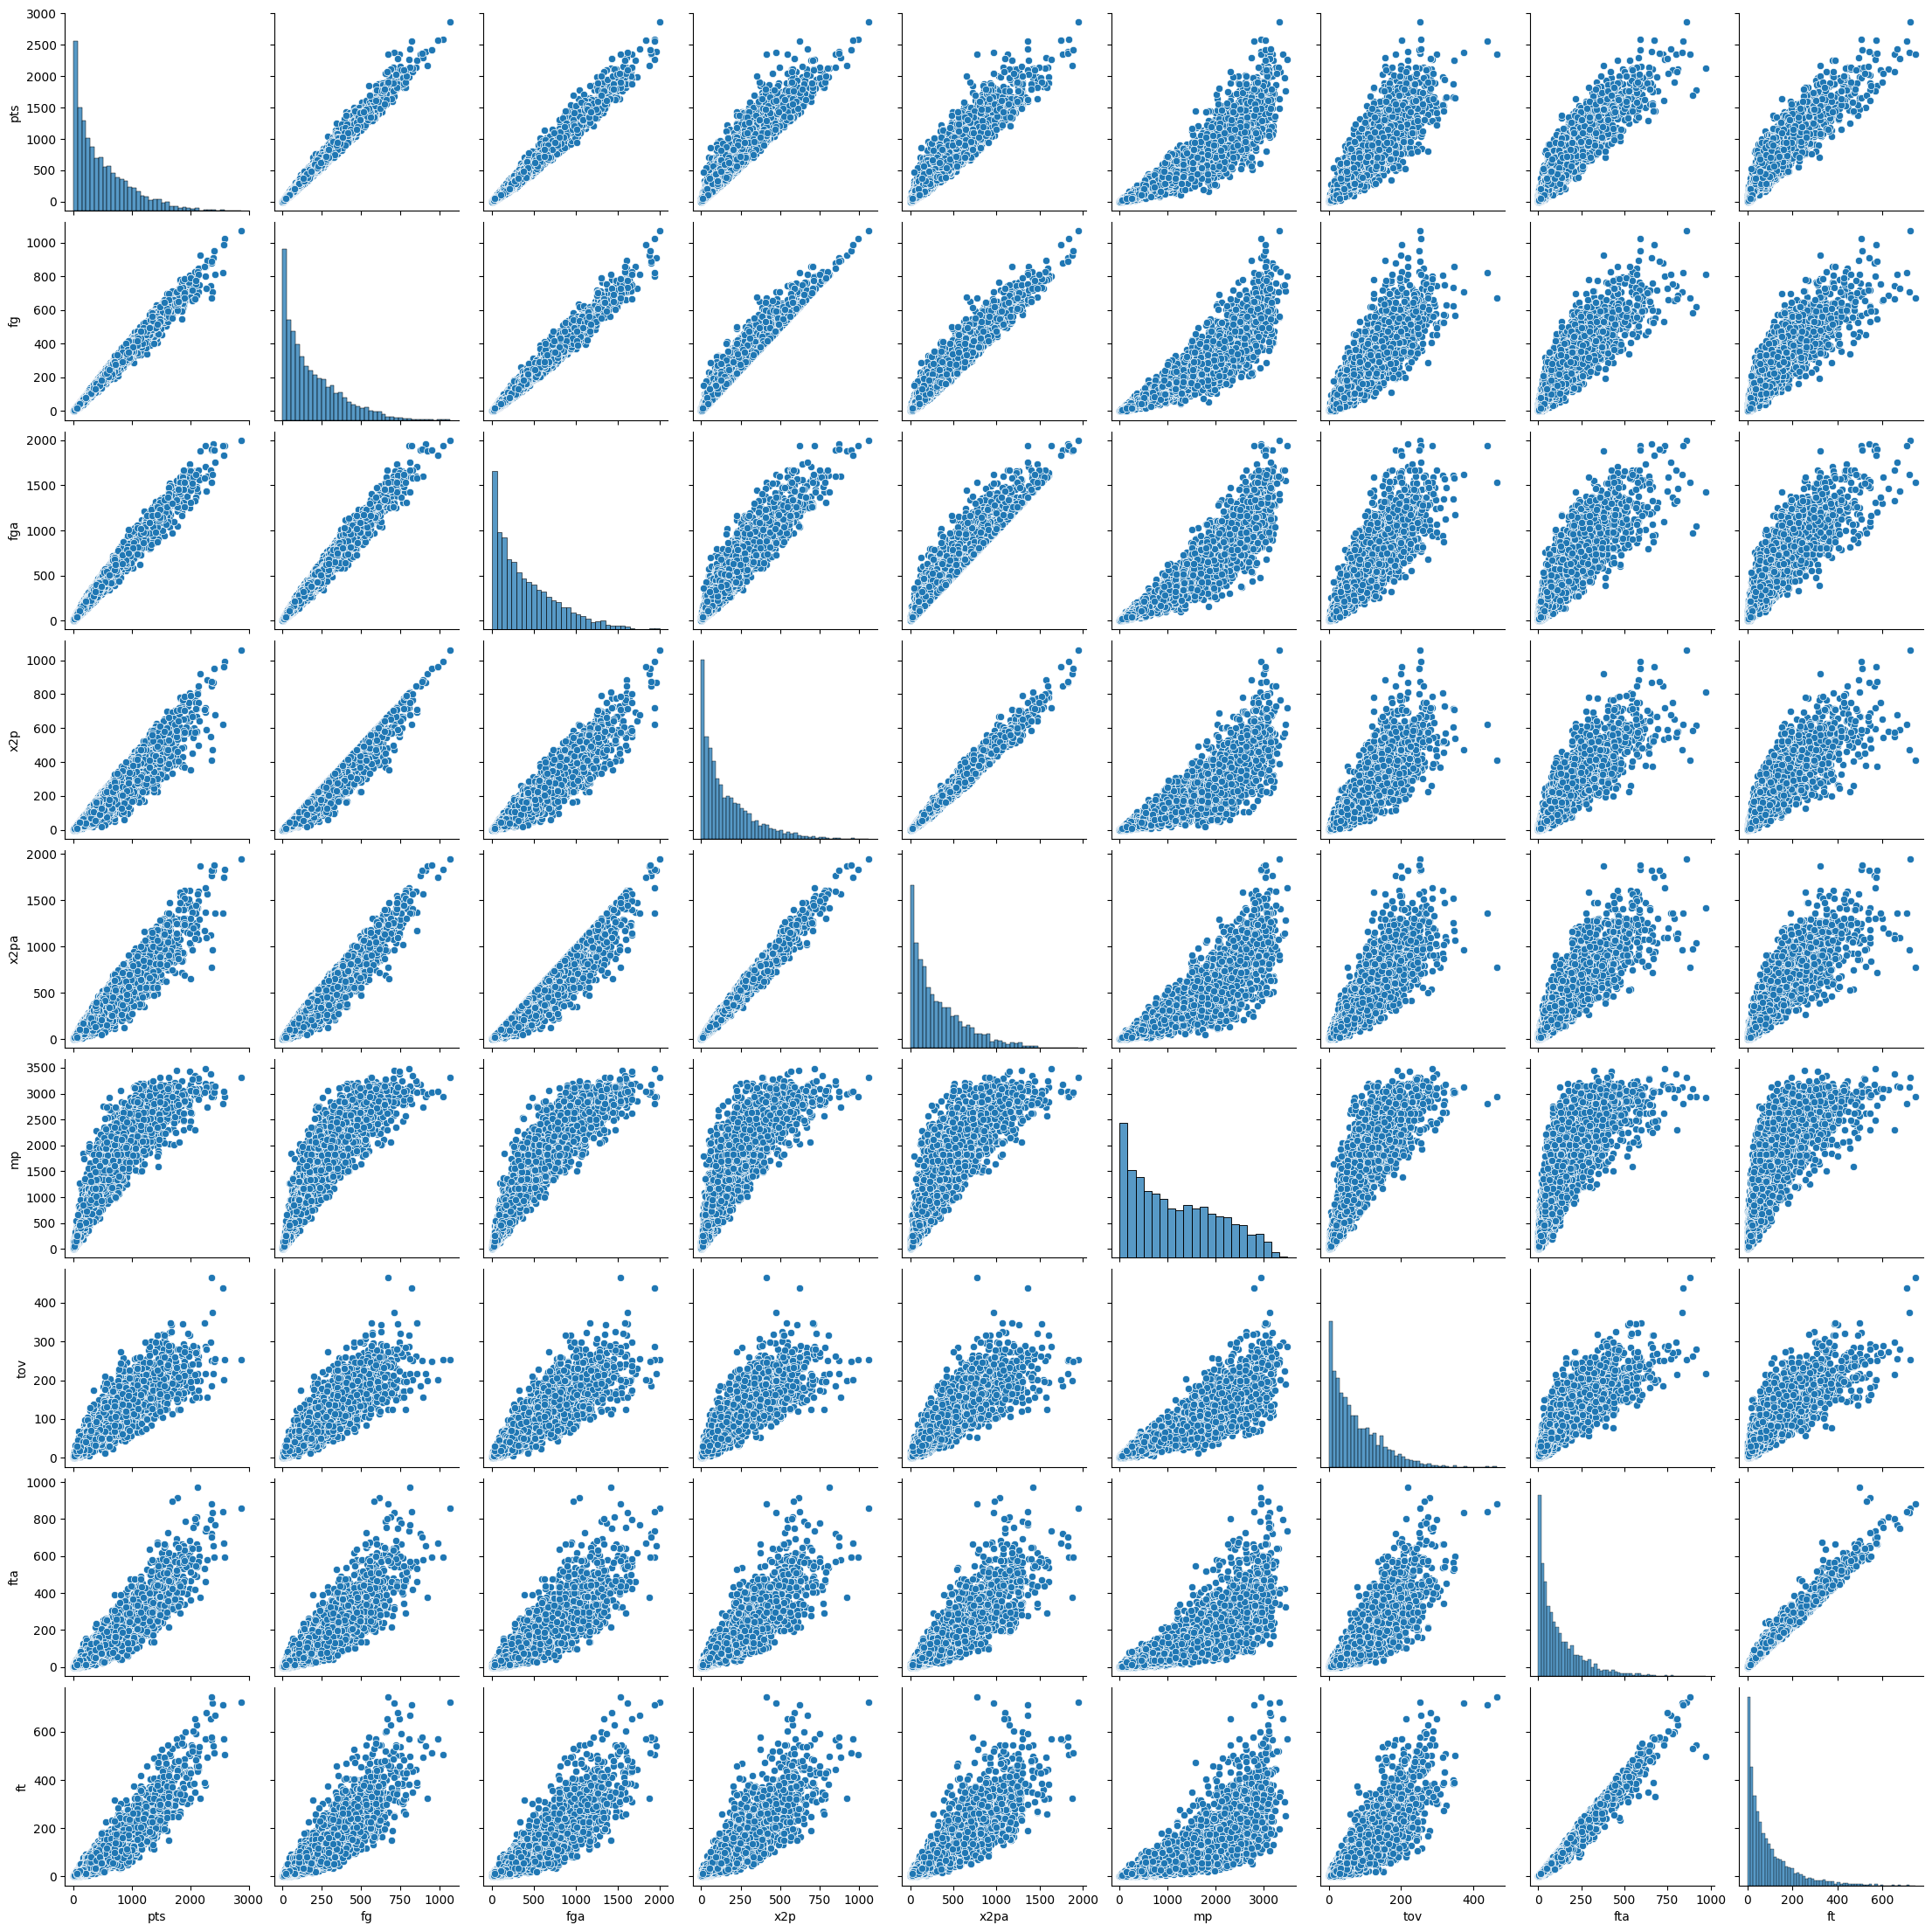

In [ ]:
# pair plots for [pts, fg, fga, x2p, x2pa, mp, tov, fta, ft]
sns.pairplot(quarter_df[['pts', 'fg', 'fga', 'x2p', 'x2pa', 'mp', 'tov', 'fta', 'ft']])
# drop fg and fga
# drop x2pa and fta
# drop x3pa
# let's keep points, x2p, ft, mp, tov, x3p

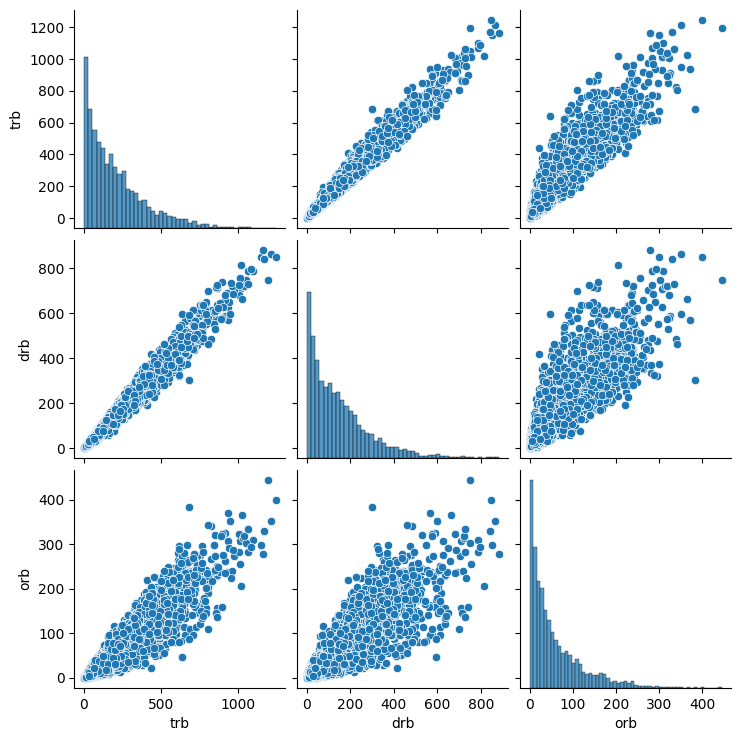

In [ ]:
# pair plots for ['trb', 'drb', 'orb']
sns.pairplot(quarter_df[['trb', 'drb', 'orb']])
# drop drb, keep trb and orb

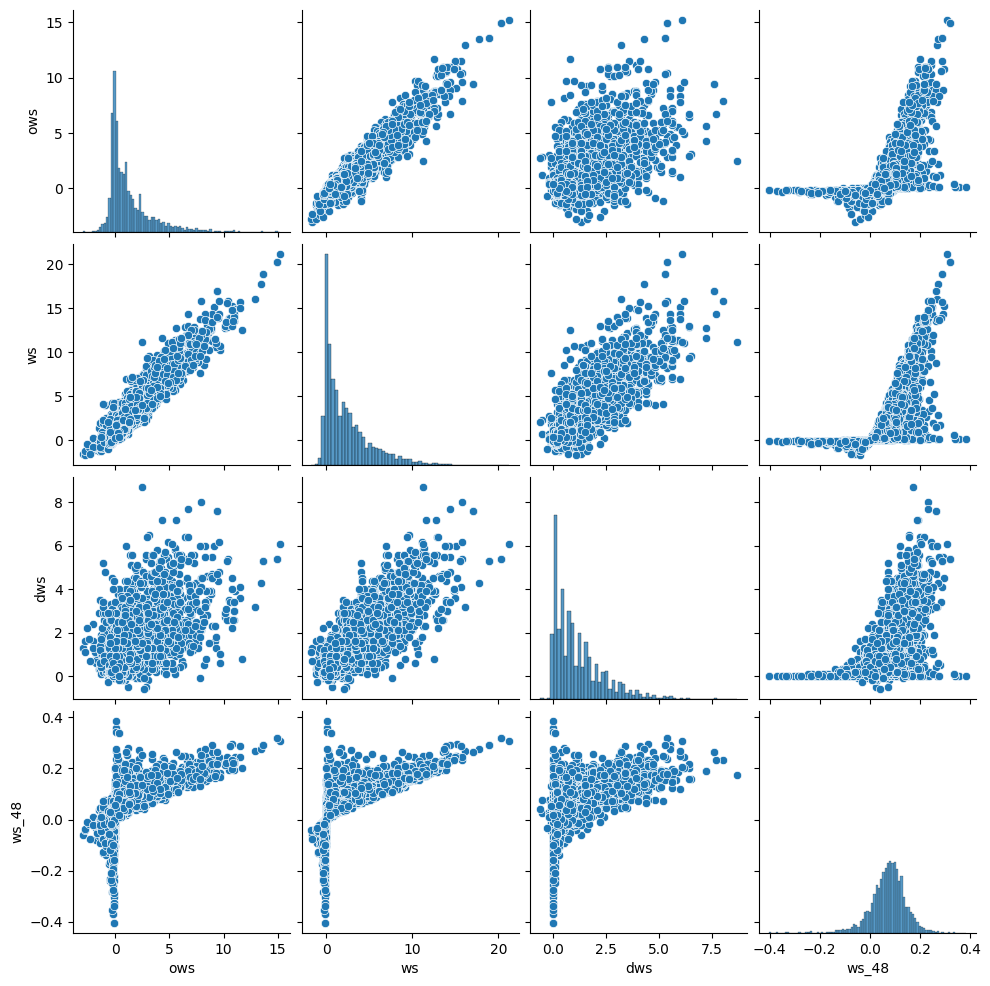

In [ ]:
# pair plots for ['ows', 'ws', 'dws', 'ws_48']
sns.pairplot(quarter_df[['ows', 'ws', 'dws', 'ws_48']])
# drop ows, keep ws and dws
# what is happening with the ws_48?

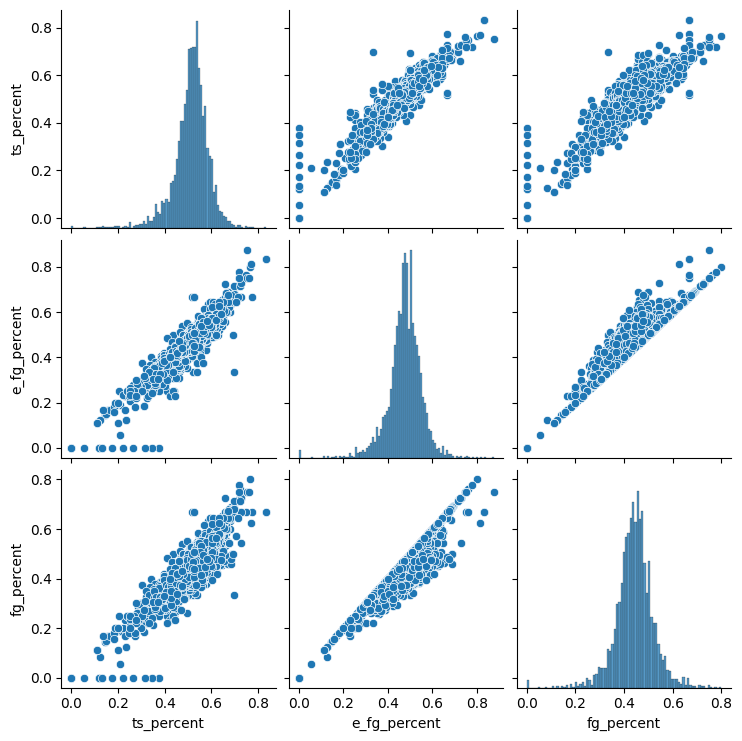

In [ ]:
# pairplot of ['ts_percent', 'e_fg_percent', 'fg_percent']
sns.pairplot(quarter_df[['ts_percent', 'e_fg_percent', 'fg_percent']])
# keep ts_percent, drop e_fg_percent and fg_percent

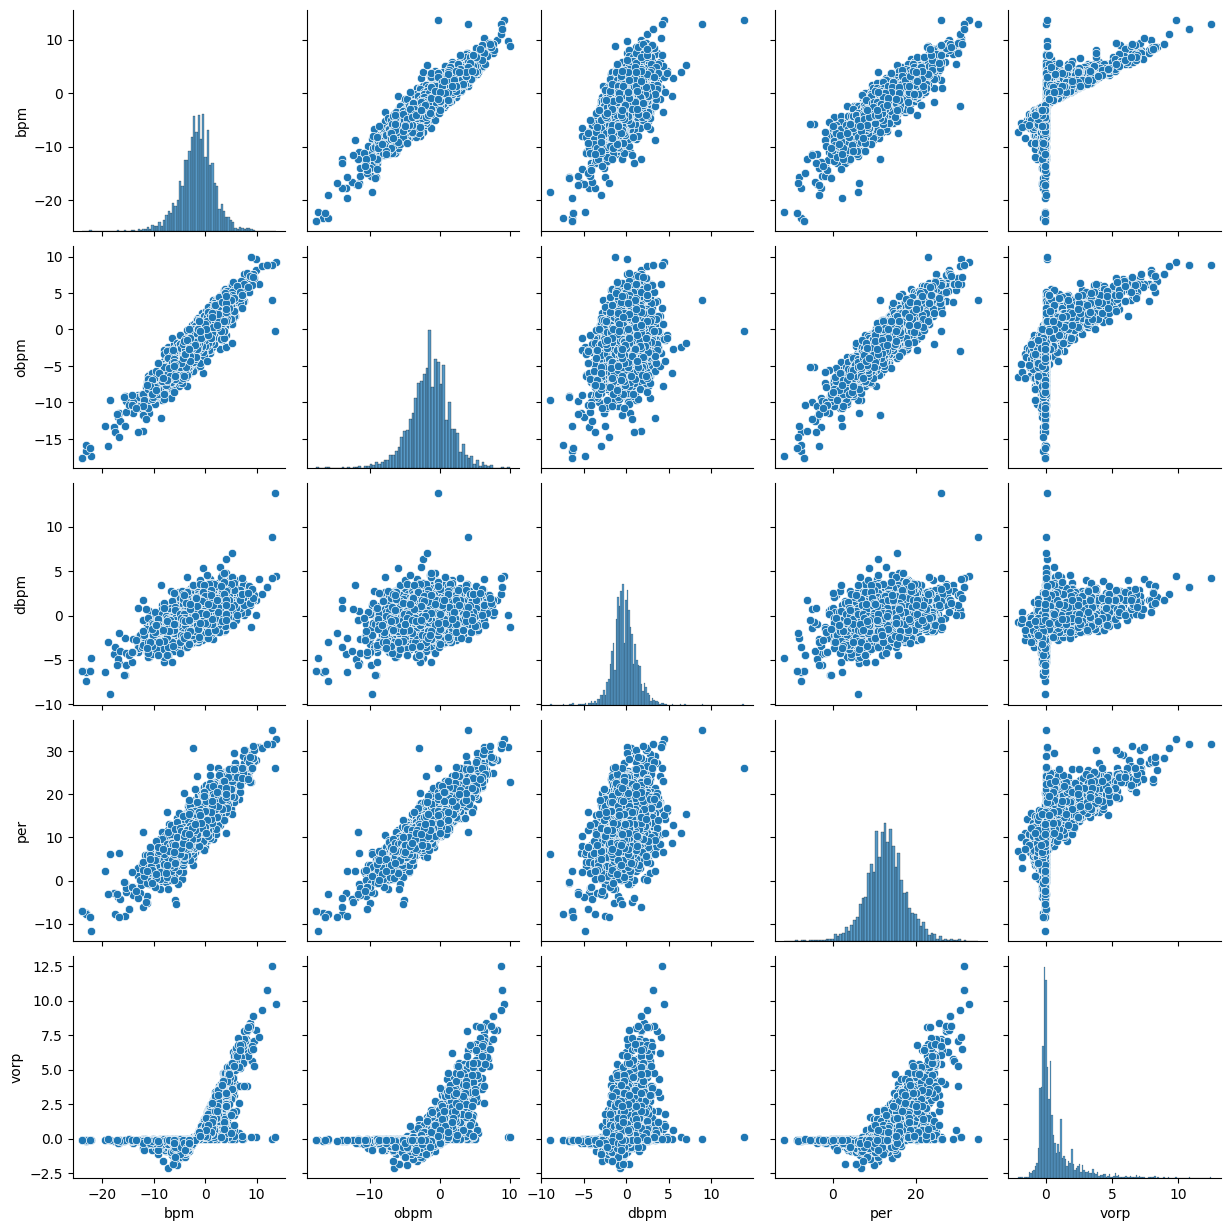

In [ ]:
# pairplot for ['bpm', 'obpm', 'dbpm', 'per', 'vorp']
sns.pairplot(quarter_df[['bpm', 'obpm', 'dbpm', 'per', 'vorp']])
# there is a lot of overlap here, vorp seems different only because of the hilt shape
# definitely overlap between bpm and obpm and per
# keep vorp, dbpm, and obpm
# drop per, bpm

## Simplifying categories

In [ ]:
# based on the .corr(), I am going to remove some columns
# trim down to only win share
dropped_cols = ['fg', 'fga', 'x2pa', 'fta', 'x3pa', 'drb', 'ows', 'e_fg_percent', 'fg_percent', 'per', 'bpm']
df = df.drop(dropped_cols,axis=1)

# check correlation again
corr = df.drop(['seas_id','season','player_id','Unnamed: 0'],axis=1).corr().stack()
corr = corr[corr.index.get_level_values(0) != corr.index.get_level_values(1)]
corr.sort_values(ascending=False).head(60)

# potential candidates for further drops:
# ['x2p', 'orb', 'ws', 'drb_percent']
# x2p is similar to pts, orb is similar to trb, ws is similar to vorp, drb_% is similar to trb_%

pts              x2p                0.949892
x2p              pts                0.949892
trb_percent      drb_percent        0.936878
drb_percent      trb_percent        0.936878
orb              trb                0.931770
trb              orb                0.931770
pts              ft                 0.928267
ft               pts                0.928267
mp               pts                0.922291
pts              mp                 0.922291
vorp             ws                 0.909997
ws               vorp               0.909997
tov              pts                0.904540
pts              tov                0.904540
age              experience         0.899679
experience       age                0.899679
mp               tov                0.894741
tov              mp                 0.894741
x2p              ft                 0.887827
ft               x2p                0.887827
tov              x2p                0.883703
x2p              tov                0.883703
mp        

In [ ]:
# potential candidates for further drops:
# ['x2p', 'orb', 'ws', 'drb_percent']
# x2p is similar to pts, orb is similar to trb, ws is similar to vorp, drb_% is similar to trb_%
# experience is more pertinent than age
more_dropped_cols = ['x2p', 'orb', 'ws', 'drb_percent', 'age']
df = df.drop(more_dropped_cols,axis=1)

# check correlation again
corr = df.drop(['seas_id','season','player_id','Unnamed: 0'],axis=1).corr().stack()
corr = corr[corr.index.get_level_values(0) != corr.index.get_level_values(1)]
corr.sort_values(ascending=False).head(30)

pts              ft                 0.928267
ft               pts                0.928267
mp               pts                0.922291
pts              mp                 0.922291
                 tov                0.904540
tov              pts                0.904540
mp               tov                0.894741
tov              mp                 0.894741
                 ft                 0.869023
ft               tov                0.869023
mp               pf                 0.867951
pf               mp                 0.867951
g                mp                 0.856814
mp               g                  0.856814
trb_percent      orb_percent        0.856154
orb_percent      trb_percent        0.856154
pf               g                  0.854222
g                pf                 0.854222
mp               stl                0.841663
stl              mp                 0.841663
trb              dws                0.836357
dws              trb                0.836357
ft        

In [ ]:
# check mp vs others
df.corrwith(df['mp']).sort_values(ascending=False)

mp                 1.000000
pts                0.922291
tov                0.894741
pf                 0.867951
g                  0.856814
stl                0.841663
ft                 0.822293
dws                0.803712
trb                0.796028
ast                0.728110
vorp               0.661115
obpm               0.614579
blk                0.511137
x3p                0.483110
ws_48              0.477106
ts_percent         0.374350
all_star           0.296625
ft_percent         0.285396
usg_percent        0.282647
x2p_percent        0.267659
ast_percent        0.253673
x3p_percent        0.183588
dbpm               0.151737
experience         0.149645
Unnamed: 0         0.122896
stl_percent        0.062204
tm_win_percent     0.058881
attend             0.034956
seas_avg_attend    0.023035
f_tr               0.004809
trb_percent       -0.004334
blk_percent       -0.030517
x3p_ar            -0.045759
orb_percent       -0.074666
season            -0.122126
seas_id           -0

In [ ]:
df = df.drop(['mp'],axis=1)

In [ ]:
df.columns

Index(['Unnamed: 0', 'seas_id', 'season', 'player_id', 'player', 'pos',
       'experience', 'tm', 'g', 'ts_percent', 'x3p_ar', 'f_tr', 'orb_percent',
       'trb_percent', 'ast_percent', 'stl_percent', 'blk_percent',
       'tov_percent', 'usg_percent', 'dws', 'ws_48', 'obpm', 'dbpm', 'vorp',
       'x3p', 'x3p_percent', 'x2p_percent', 'ft', 'ft_percent', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts', 'all_star', 'attend',
       'tm_win_percent', 'seas_avg_attend'],
      dtype='object')

Descriptions of remaining columns

In [ ]:
#Summary stats on remaining features
features = ['experience', 'tm', 'g', 'ts_percent', 'x3p_ar', 'f_tr', 'orb_percent',
       'trb_percent', 'ast_percent', 'stl_percent', 'blk_percent',
       'tov_percent', 'usg_percent', 'dws', 'ws_48', 'obpm', 'dbpm', 'vorp',
       'x3p', 'x3p_percent', 'x2p_percent', 'ft', 'ft_percent', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts', 'all_star', 'attend',
       'tm_win_percent', 'seas_avg_attend']
for feature in features:
  print(df[feature].describe())
  print()

count    21129.000000
mean         5.495102
std          3.886803
min          1.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         22.000000
Name: experience, dtype: float64

count     21129
unique       41
top         TOT
freq       1999
Name: tm, dtype: object

count    21129.000000
mean        50.938000
std         24.870241
min          5.000000
25%         29.000000
50%         55.000000
75%         74.000000
max         85.000000
Name: g, dtype: float64

count    21129.000000
mean         0.514247
std          0.074693
min          0.000000
25%          0.480000
50%          0.522000
75%          0.557000
max          1.078000
Name: ts_percent, dtype: float64

count    21129.000000
mean         0.192897
std          0.205192
min          0.000000
25%          0.009000
50%          0.113000
75%          0.346000
max          1.000000
Name: x3p_ar, dtype: float64

count    21129.000000
mean         0.306111
std          0.185077
min          0.000

In [ ]:
#Get proportion of all-star to not
class_counts = df['all_star'].value_counts()
class_percentages = pd.Series([(x / df.shape[0]) * 100.00 for x in class_counts])
print(class_percentages)

0    97.160301
1     2.839699
dtype: float64


## Boxplots against 'All-Star'

In [ ]:
df.columns

Index(['Unnamed: 0', 'seas_id', 'season', 'player_id', 'player', 'pos',
       'experience', 'tm', 'g', 'ts_percent', 'x3p_ar', 'f_tr', 'orb_percent',
       'trb_percent', 'ast_percent', 'stl_percent', 'blk_percent',
       'tov_percent', 'usg_percent', 'dws', 'ws_48', 'obpm', 'dbpm', 'vorp',
       'x3p', 'x3p_percent', 'x2p_percent', 'ft', 'ft_percent', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts', 'all_star', 'attend',
       'tm_win_percent', 'seas_avg_attend'],
      dtype='object')

In [ ]:
# create function to speed up plotting
def boxplot_list(list):
  list = list
  fig, ax =plt.subplots(1,len(list), figsize=(20,4))
  for i in range(len(list)):
    sns.boxplot(data=df, y=list[i], x='all_star', ax=ax[i]).set_title(list[i])
  plt.show()
# convert 'all_star' to 0/1 instead of T/f
df.all_star = df.all_star.replace({True: 1, False: 0})

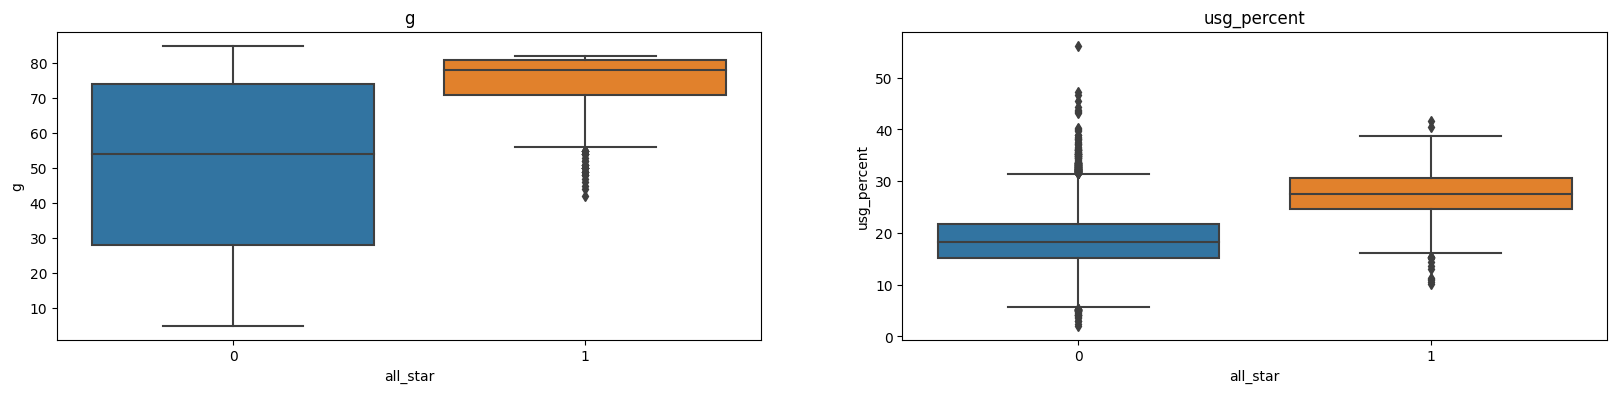

In [ ]:
# plot games and usage
boxplot_list(['g','usg_percent'])

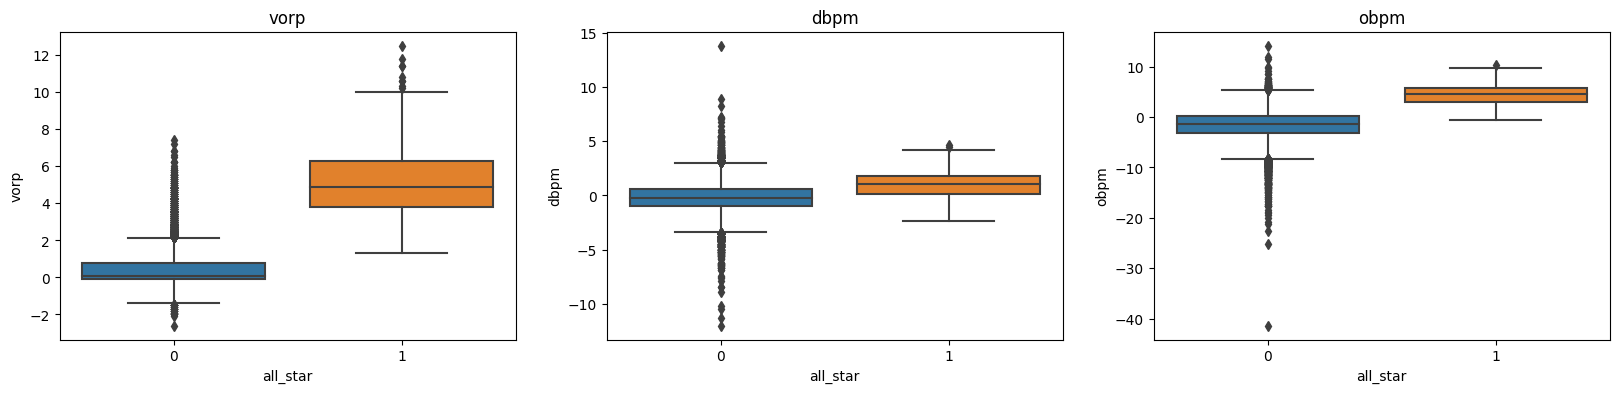

In [ ]:
# plot vorp, win-share, box plus/minus, per
boxplot_list(['vorp', 'dbpm', 'obpm'])

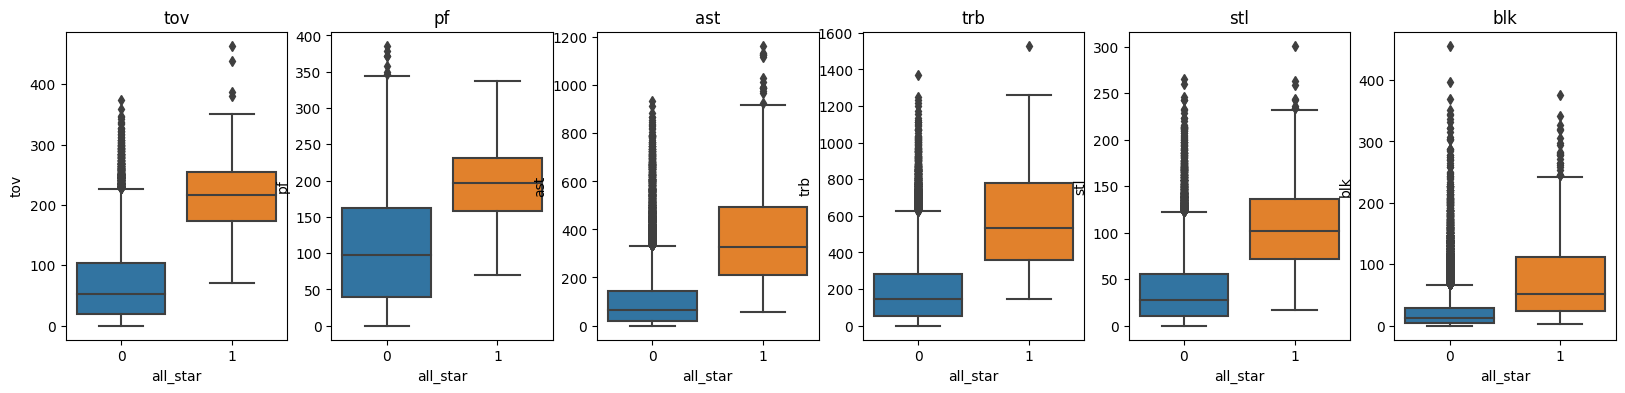

In [ ]:
# plot turnovers, personal fouls, assists, rebounds, steals, blocks
boxplot_list(['tov','pf','ast','trb','stl','blk',])

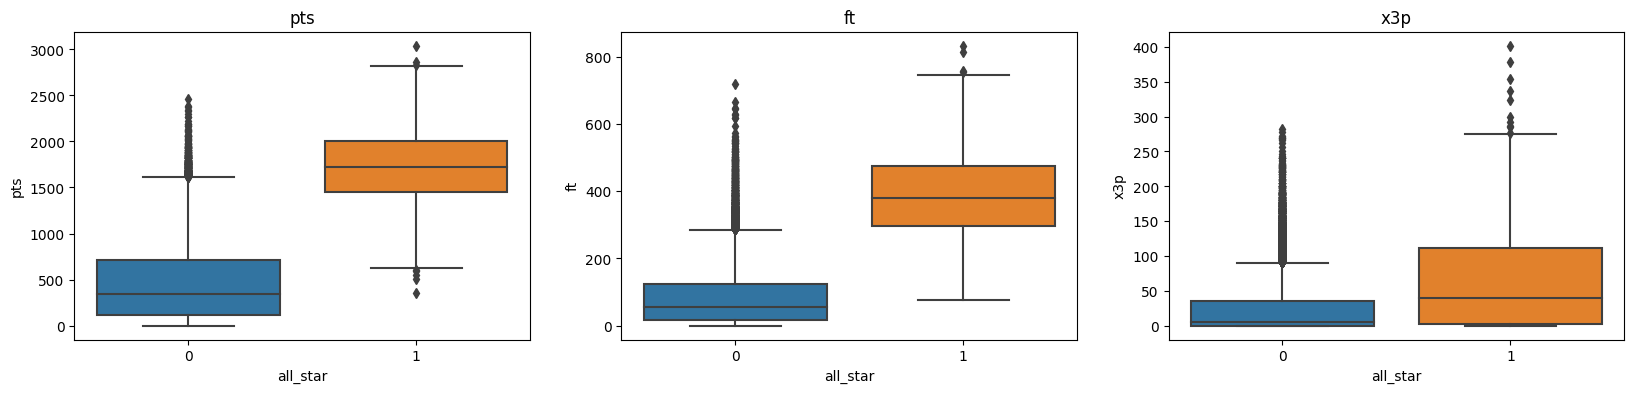

In [ ]:
# plot scoring
boxplot_list(['pts','ft', 'x3p'])

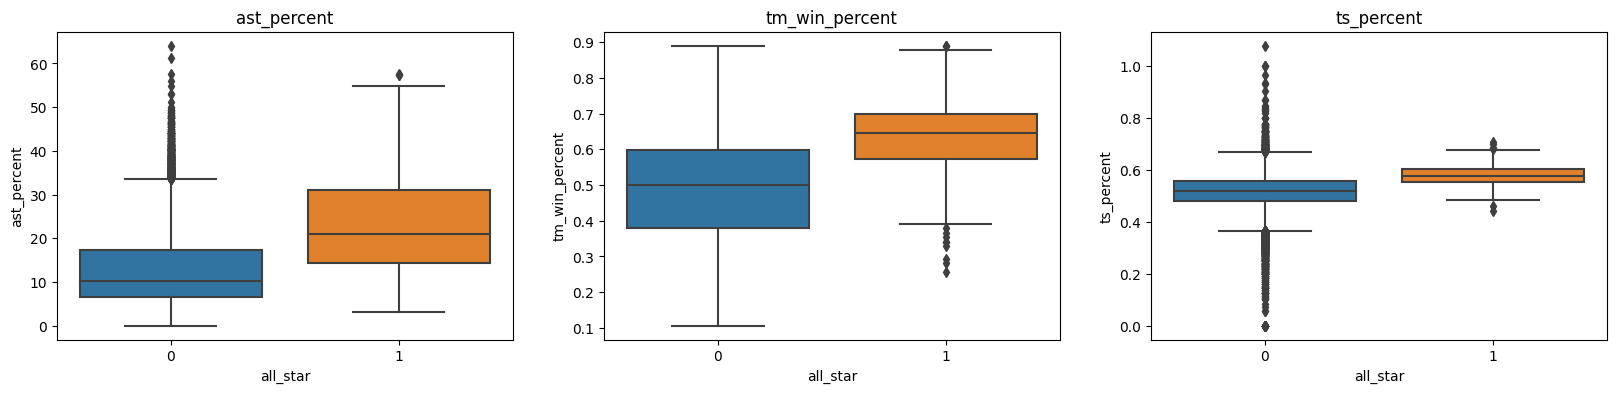

In [ ]:
# plot assist%, team win%, true shooting
boxplot_list(['ast_percent', 'tm_win_percent','ts_percent'])

In [ ]:
print(len(df.columns))
df.columns

40


Index(['Unnamed: 0', 'seas_id', 'season', 'player_id', 'player', 'pos',
       'experience', 'tm', 'g', 'ts_percent', 'x3p_ar', 'f_tr', 'orb_percent',
       'trb_percent', 'ast_percent', 'stl_percent', 'blk_percent',
       'tov_percent', 'usg_percent', 'dws', 'ws_48', 'obpm', 'dbpm', 'vorp',
       'x3p', 'x3p_percent', 'x2p_percent', 'ft', 'ft_percent', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts', 'all_star', 'attend',
       'tm_win_percent', 'seas_avg_attend'],
      dtype='object')

In [59]:
from google.colab import files
df.to_csv('nba_clean2.csv', encoding = 'utf-8-sig') 
files.download('nba_clean2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

I am down to 40 columns and 5 of those are related to ids/names. Each feature seems to contribute something different, although there is still some correlation. For example, points, free throws, and turnovers are all correlated, but measure different things.

I am curious to see how a model  using only vorp compares to multivariable regressions.

Some other questions that popped into my head (but I probably won't explore) are how do these predictors differ for different positions? I would expect rebounds to matter more for centers in terms of all-star selection compared to point guards, for example. How have these predictors changed over time? I was suprised three-point shooting did not seem to be very correlated, and I wonder if it has become more important in the last 10 years than it was 30 years ago.

In terms of techinical questions, I am wondering if I need to scale the data before modeling. That is a process that I do not fully understand yet.